In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(precision=9)

In [3]:
# sample 1
x = np.array(range(475,491),dtype="float64")
y = np.array([2.54100,2.44600,2.33400,2.19800,2.06500,1.90600,1.73000,
     1.56100,1.41200,1.30500,1.18700,1.04900,0.93500,0.84090,
     0.75510,0.68640],dtype="float64")
wavelength_list = [482,483,484,485]

In [19]:
# sample 2
x = np.array(range(550,571),dtype="float64")
y = np.array([2.347,2.229,2.124,2.011,1.887,1.741,1.624,1.519,1.410,1.288,
              1.187,1.096,1.021,0.9439,0.8695,0.8018,0.7457,0.6975,0.6467,
              0.5956,0.5515],dtype="float64")
wavelength_list = [560,561,562,563]

In [15]:
# sample 3
x = np.array(range(590,616),dtype="float64")
y = np.array([1.157,1.140,1.120,1.092,1.062,1.025,0.9891,0.9491,0.9031,0.8599,
              0.7947,0.7483,0.7076,0.6566,0.6037,0.5572,0.5199,0.4854,0.4481,
              0.4147,0.3825,0.3566,0.3336,0.3100,0.2869,0.2624],dtype="float64")
wavelength_list = [604,605,606,607]

In [20]:
# 3rd degree polynomial regression
y_poly = np.poly1d(np.polyfit(x, y, 3))
y_plot = y_poly(x)
print(np.polyfit(x, y, 3))

[ 6.855241969e-05 -1.125435948e-01  6.145808783e+01 -1.116055409e+04]


 points used: [560 561 562 563]
 equation of best fit line: y = [-0.088145246] x + [50.563918577]
 x-intercept: [573.643173034]


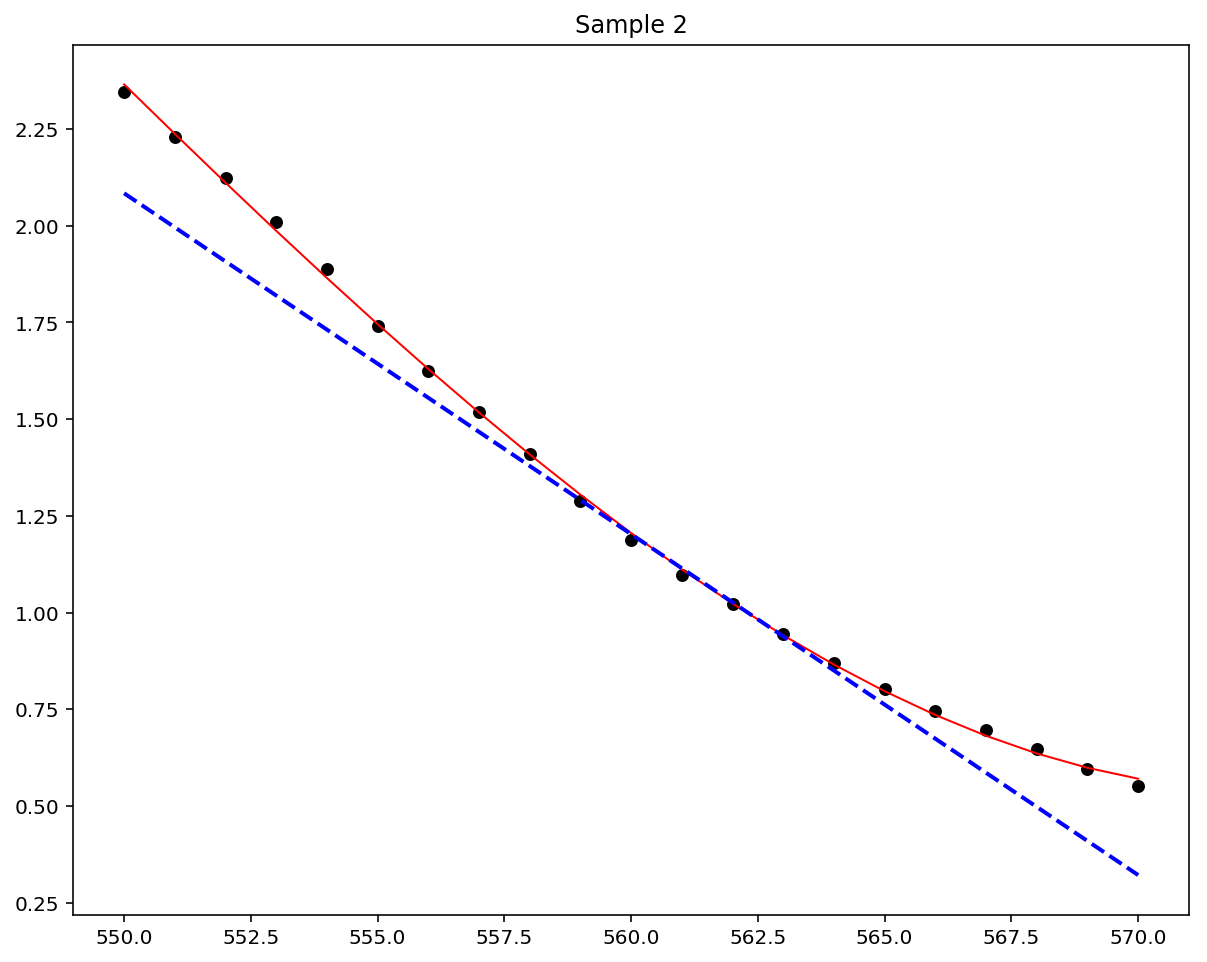

 x^3 * 6.8552e-05 + x^2 * -0.112543595 + x * 61.458087829 + -11160.554093534


In [21]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, color='k', s=30, marker='o')
plt.plot(x, y_plot, color="r", linewidth=1,)

A = []
best_fit_line = LinearRegression()
for wavelength in wavelength_list:
    A.append(y_poly(wavelength))
A = np.array(A).reshape(-1, 1)
wavelength_list = np.array(wavelength_list).reshape(-1, 1)
best_fit_line.fit(wavelength_list, A)

best_fit_line_y = best_fit_line.predict(wavelength_list)
gradient = (best_fit_line_y[3] - best_fit_line_y[0])/3
y_intercept = best_fit_line_y[1] - gradient*wavelength_list[1]
print(" points used:",wavelength_list.reshape(4,))
print(" equation of best fit line: y =",gradient,"x +",y_intercept)
plt.plot(x, gradient*x+y_intercept, linestyle="--",color="b", linewidth=2,)
x_intercept = -1*y_intercept/gradient
print(" x-intercept:",x_intercept)

plt.title("Sample 2")
plt.show()
print(" x^3 *",round(np.polyfit(x, y, 3)[0],9),end=" ")
print("+ x^2 *",round(np.polyfit(x, y, 3)[1],9),end=" ")
print("+ x *",round(np.polyfit(x, y, 3)[2],9),end=" ")
print("+",round(np.polyfit(x, y, 3)[3],9))

In [ ]:
"""plt.figure(figsize=(10,8))
plt.scatter(x, y, color='k', s=30, marker='o')
plt.plot(x, y_plot, color="r", linewidth=2,)
wavelength_list = [559,560,561,562]
x_intercepts = []
for i,wavelength in enumerate(wavelength_list):
    delta = 0.001
    gradient = (y_poly(wavelength+delta) - y_poly(wavelength)) / delta
    #print("gradient",i+1,gradient)
    intercept = y_poly(wavelength) - gradient * wavelength
    curr_y = gradient * wavelength + intercept
    #print("y-intercept",i+1,intercept)
    x_intercept = (0 - intercept)/gradient
    print(" x-intercept",i+1,x_intercept)
    x_intercepts.append(x_intercept)
    plt.plot(x, gradient*x+intercept, color="b", linewidth=2,)

plt.title("Sample 2")
plt.show()
print(" x^3 *",round(np.polyfit(x, y, 3)[0],9),end=" ")
print("+ x^2 *",round(np.polyfit(x, y, 3)[1],9),end=" ")
print("+ x *",round(np.polyfit(x, y, 3)[2],9),end=" ")
print("+",round(np.polyfit(x, y, 3)[3],9))
print(" mean x-intercept", np.mean(x_intercepts))"""